In [22]:
import numpy 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import ast


In [17]:
all_df=[]
all_models=[]
for t in os.listdir('marginal_dist'):
    if 'VAE' in t:
        if 'kl_divergence.txt' in os.listdir('marginal_dist/'+t):
            print(t)
            df=pd.read_csv('marginal_dist/'+t+'/kl_divergence.txt',header=None)
            df['model']=t
            all_df.append(df)
            all_models.append(t)

TimeVAE_model14
TimeVAE_model9
TimeVAE_model17
TimeVAE_model10
TimeVAE_model12
TimeVAE_model13
TimeVAE_model16
TimeVAE_model11
TimeVAE_model15


In [37]:
all_models_info=[]
for _model in os.listdir('../TVAE/saved_models'):
    if _model in all_models:
        # print(_model)
        with open('../TVAE/saved_models/'+_model+'/config.txt','r') as f:
            text_data=f.read()
        data_dict = {}
        for line in text_data.strip().split('\n'):
            key, value = line.split(' : ')
            try:
                value = ast.literal_eval(value)  # Convert strings to appropriate Python objects (int, float, list, etc.)
            except (ValueError, SyntaxError):
                pass  # If conversion fails, keep the value as a string
            data_dict[key] = value

        # Step 3: Convert the dictionary into a pandas DataFrame
        df_model_info = pd.DataFrame(list(data_dict.items()), columns=['Parameter', 'Value'])
        df_model_info['model']=_model
        all_models_info.append(df_model_info)
df_info=pd.concat(all_models_info)
latent_dims=pd.concat(all_models_info)
latent_dims=latent_dims[latent_dims['Parameter']=='latent_dim']

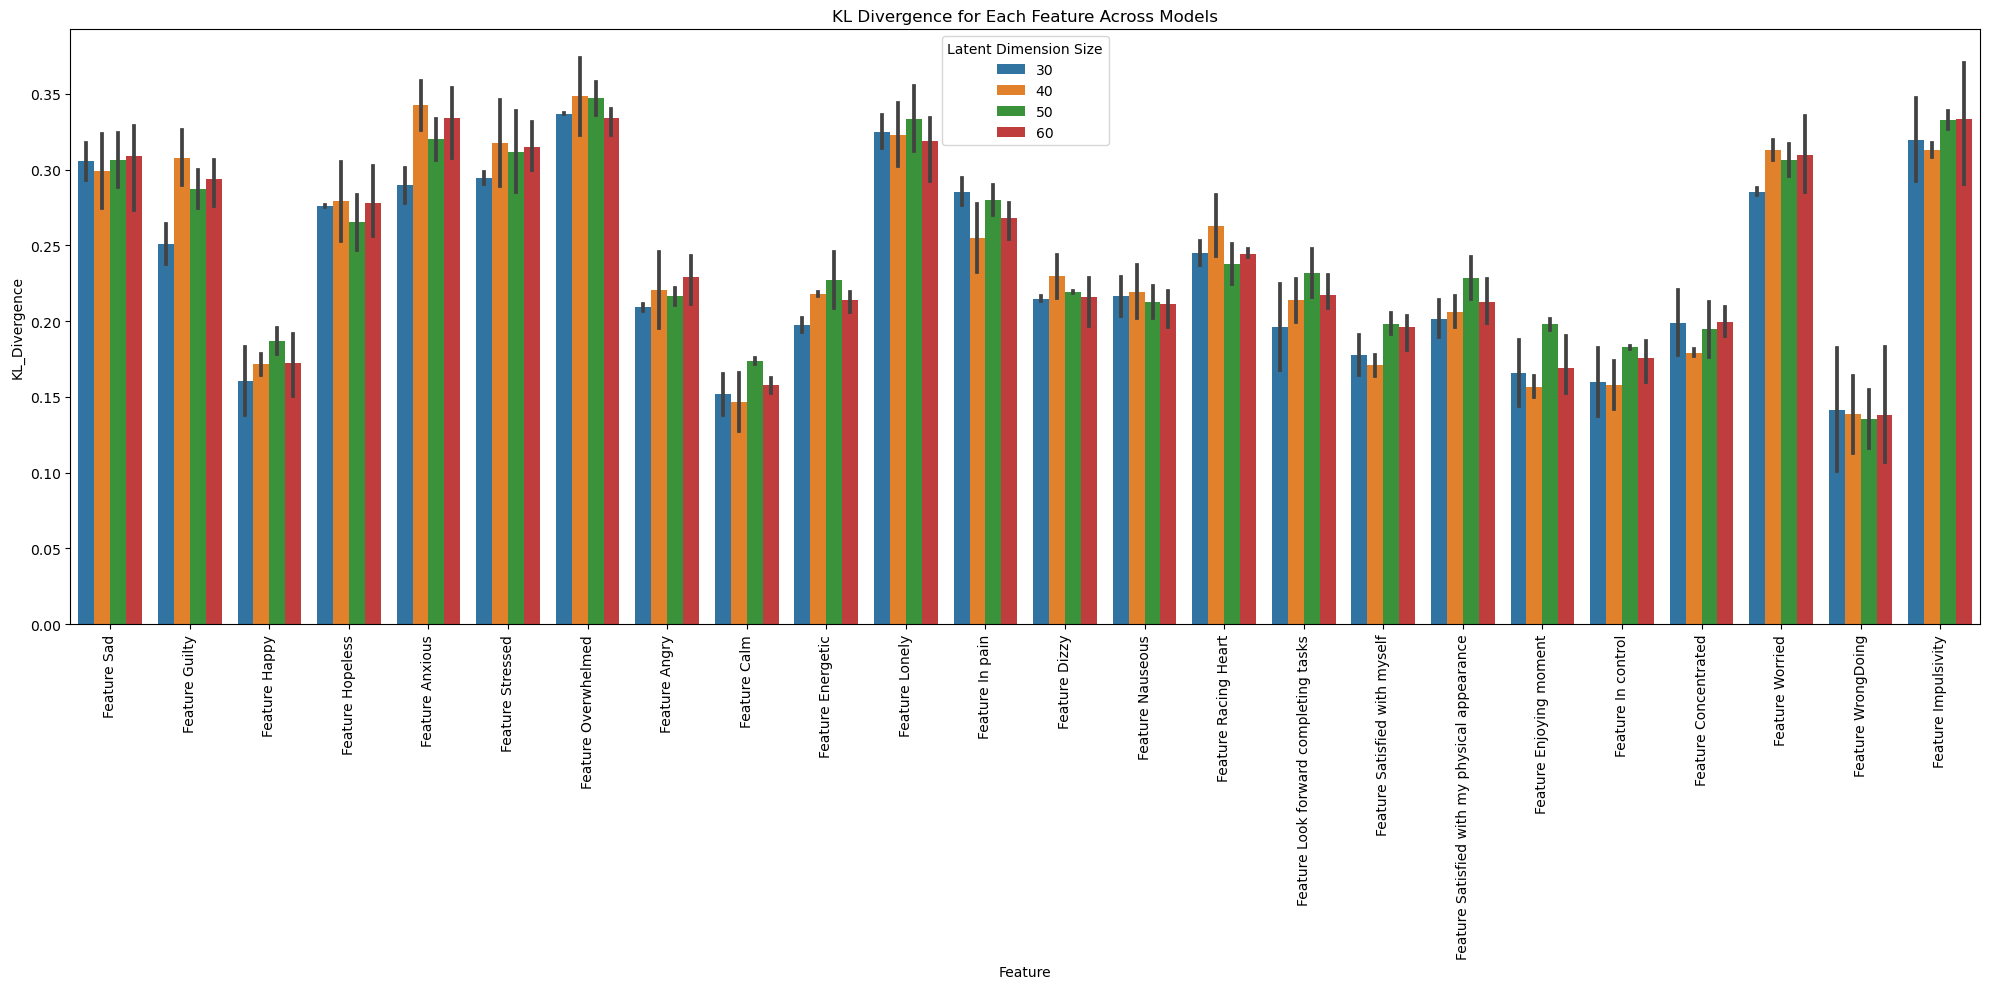

In [44]:
combined_df = pd.concat(all_df)

combined_df[['Feature', 'KL_Divergence']] = combined_df[0].str.split(': ', expand=True)
combined_df['KL_Divergence'] = combined_df['KL_Divergence'].astype(float)
result=pd.merge(combined_df,latent_dims,left_on='model',right_on='model')
result['Latent_Dimension_Size']=result['Value']
# Select relevant columns
combined_df = result[['Feature', 'KL_Divergence', 'Latent_Dimension_Size']]

# Step 3: Create bar charts for each feature using seaborn
# Set the size of the overall figure
plt.figure(figsize=(20, 10))

# Create a bar plot for each feature
sns.barplot(data=combined_df, x='Feature', y='KL_Divergence', hue='Latent_Dimension_Size')

# Customize the plot
plt.xticks(rotation=90)
plt.title('KL Divergence for Each Feature Across Models')
plt.legend(title='Latent Dimension Size')
plt.tight_layout()

# Show the plot
plt.show()

,Parameter,Value,model
4,latent_dim,60,TimeVAE_model14
4,latent_dim,60,TimeVAE_model9
4,latent_dim,30,TimeVAE_model17
4,latent_dim,60,TimeVAE_model10
4,latent_dim,40,TimeVAE_model12
4,latent_dim,30,TimeVAE_model13
4,latent_dim,40,TimeVAE_model16
4,latent_dim,50,TimeVAE_model11
4,latent_dim,50,TimeVAE_model15
